In [10]:
# LSTM for international airline passengers problem with memory
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
np.random.seed(7)
# load the dataset
dataframe = pd.read_csv('/home/sh4n1/miniproj/h1cpudata.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network


In [11]:
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(200):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()

5780/5780 - 6s - loss: 0.0049
5780/5780 - 5s - loss: 0.0031
5780/5780 - 5s - loss: 0.0024
5780/5780 - 5s - loss: 0.0020
5780/5780 - 5s - loss: 0.0017
5780/5780 - 5s - loss: 0.0016
5780/5780 - 6s - loss: 0.0015
5780/5780 - 6s - loss: 0.0015
5780/5780 - 5s - loss: 0.0015
5780/5780 - 6s - loss: 0.0014
5780/5780 - 6s - loss: 0.0014
5780/5780 - 6s - loss: 0.0014
5780/5780 - 6s - loss: 0.0014
5780/5780 - 6s - loss: 0.0014
5780/5780 - 6s - loss: 0.0014
5780/5780 - 7s - loss: 0.0014
5780/5780 - 6s - loss: 0.0014
5780/5780 - 6s - loss: 0.0014
5780/5780 - 6s - loss: 0.0014
5780/5780 - 5s - loss: 0.0014
5780/5780 - 5s - loss: 0.0014
5780/5780 - 6s - loss: 0.0014
5780/5780 - 6s - loss: 0.0014
5780/5780 - 6s - loss: 0.0014
5780/5780 - 6s - loss: 0.0014
5780/5780 - 5s - loss: 0.0014
5780/5780 - 5s - loss: 0.0014
5780/5780 - 5s - loss: 0.0014
5780/5780 - 5s - loss: 0.0014
5780/5780 - 6s - loss: 0.0014
5780/5780 - 6s - loss: 0.0014
5780/5780 - 5s - loss: 0.0014
5780/5780 - 6s - loss: 0.0014
5780/5780 

In [12]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [13]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 446.56 RMSE
Test Score: 1031.76 RMSE


In [14]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

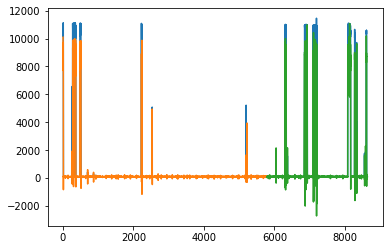

In [15]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [16]:
model.save('lstm_memory.h5')